<a href="https://colab.research.google.com/github/Amulya77/SEM7/blob/main/dl02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''Initialize the random number generator with any seed you like(I have taken 10)
2) Download the data set in .csv format and put it in the local working directory as NN.py
3) Load the data set using loadtxt()
4) Split the data set into the Independent Variables and the Class to be predicted into Xand Y
5) Create a Sequential model and add layers: ^First layer contains 12 neurons and will take 8 input variables(Activation Funtion=rectifier activation functio)
 ^Second layer contains 8 neurons(Hidden layer: Activation Funtion=rectifier activation function)
 ^Output layer will contain one neuron(Activation Funtion=Sigmoid Function:Because its a binary classification: 0 or 1)
 6)Fit the data in the model using fit()(The training process will run for a fixed number of iterations through the dataset called epochs, that we must specify using the nepochs argument)
 7)Set the number of instances that are evaluated before a weight update in the network is performed, called the batch size
  8)Used model.predict() to predict the class variable


'''
from keras.models import Sequential
from keras.layers import Dense
import numpy


numpy.random.seed(10)


dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")


X = dataset[:,0:8]
Y = dataset[:,8]


model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


model.fit(X, Y, epochs=150, batch_size=10)


predictions = model.predict(X)




scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/150
77/77 [==============================] - 1s 2ms/step - loss: 7.4835 - accuracy: 0.5938
Epoch 2/150
77/77 [==============================] - 0s 2ms/step - loss: 1.5400 - accuracy: 0.6315
Epoch 3/150
77/77 [==============================] - 0s 2ms/step - loss: 1.0480 - accuracy: 0.6367
Epoch 4/150
77/77 [==============================] - 0s 2ms/step - loss: 0.9390 - accuracy: 0.6393
Epoch 5/150
77/77 [==============================] - 0s 2ms/step - loss: 0.7939 - accuracy: 0.6576
Epoch 6/150
77/77 [==============================] - 0s 2ms/step - loss: 0.7447 - accuracy: 0.6771
Epoch 7/150
77/77 [==============================] - 0s 2ms/step - loss: 0.8066 - accuracy: 0.6471
Epoch 8/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.6810
Epoch 9/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6876 - accuracy: 0.6758
Epoch 10/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6518 - accuracy: 0.6771
Epoch 11/

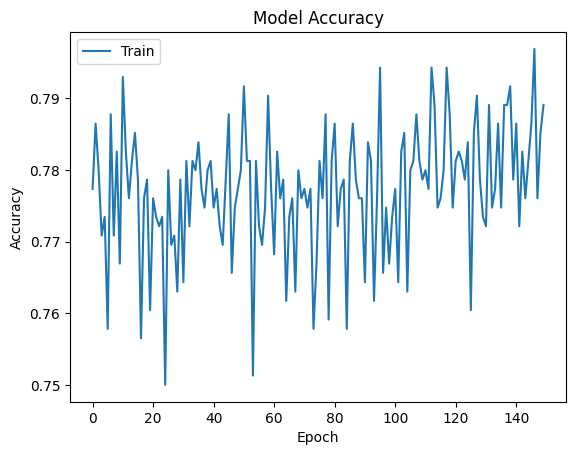

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

history = model.fit(X, Y, epochs=150, batch_size=10, verbose=0)

# Plotting the accuracy over epochs
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train'], loc='upper left')
plt.show()



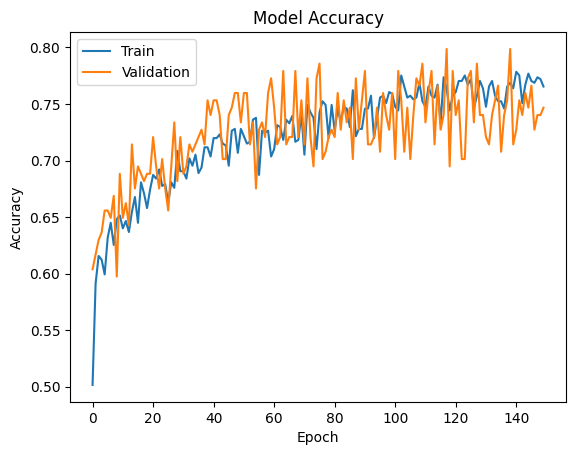

5/5 [==============================] - 0s 3ms/step - loss: 0.5590 - accuracy: 0.7468

Test accuracy: 74.68%


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

numpy.random.seed(10)

dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")

X = dataset[:, 0:8]
Y = dataset[:, 8]

# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=150, batch_size=10, verbose=0, validation_data=(X_test, Y_test))

# Plotting the accuracy over epochs for both training and testing sets
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

scores = model.evaluate(X_test, Y_test)
print("\nTest %s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))
